## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap SVC discovery scan (sneaky)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_svc_discovery_sneaky'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    16484.251658
Name: time, dtype: float64

In [4]:
duration_list = []
#print(len(merged))
for t in scan_list:
#    t['time'] = pd.to_datetime(t['time'], unit='s')
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    16484.251658
1    16484.144649
2    16484.401120
3    16484.040009
4    16483.988368
5    16484.135521
6    16484.200746
7    16484.158335
8    16484.126264
9    16484.339642
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    16484.178631
dtype: float64

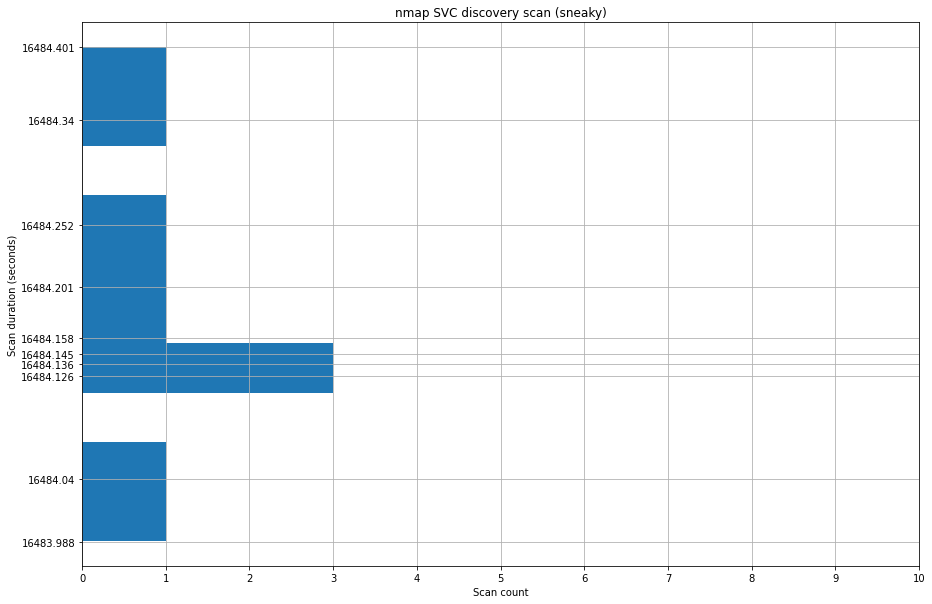

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,16484.178631
std,0.125977
min,16483.988368
25%,16484.128578
50%,16484.151492
75%,16484.238930
max,16484.401120


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1.3333997702790923



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 56742 554
2 56742 113
3 56742 587
4 56742 25
5 56742 199
6 56742 53
7 56742 8080
8 56742 5900
9 56742 445
10 56742 3389
11 56747 554
12 56742 139
13 56742 8888
14 56742 1025
15 56742 21
16 56742 256
17 56742 993
18 56742 443
19 56742 135
20 56742 995
21 56742 110
22 56749 554
23 56742 1723
24 56742 111
25 56742 23
26 56742 1720
27 56742 22
28 56742 143
29 56742 3306
30 56742 80
31 56742 9207
32 56742 9968
33 56751 554
34 56742 85
35 56742 2021
36 56742 4004
37 56742 49154
38 56742 2382
39 56742 1352
40 56742 5810
41 56742 765
42 56742 62078
43 56742 10626
44 56753 554
45 56742 2068
46 56742 1533
47 56742 1072
48 56742 1755
49 56742 1132
50 56742 8100
51 56742 1334
52 56742 2604
53 56742 32776
54 56742 1900
55 56755 554
56 56742 3580
57 56742 5850
58 56742 1524
59 56742 8090
60 56742 65129
61 56742 9575
62 56742 2399
63 56742 49153
64 56742 2009
65 56742 20000
66 56757 554
67 56742 3827
68 56742 1078
69 56742 4224
70 56742 8000
71 56742 5666
72 56742 49152
73 56742 1761
74 56742 8649


624 56742 49175
625 56742 44176
626 56742 34571
627 56859 554
628 56742 9876
629 56742 3007
630 56742 1864
631 56742 49155
632 56742 61900
633 56742 6543
634 56742 6101
635 56742 7676
636 56742 1199
637 56742 5998
638 56861 554
639 56742 60020
640 56742 6002
641 56742 2111
642 56742 9080
643 56742 255
644 56742 2601
645 56742 1061
646 56742 5925
647 56742 8994
648 56742 50001
649 56863 554
650 56742 5033
651 56742 2260
652 56742 340
653 56742 777
654 56742 6901
655 56742 5050
656 56742 9110
657 56742 1098
658 56742 1433
659 56742 3918
660 56865 554
661 56742 5989
662 56742 34572
663 56742 49176
664 56742 20222
665 56742 1141
666 56742 90
667 56742 18101
668 56742 58080
669 56742 2119
670 56742 2121
671 56867 554
672 56742 7627
673 56742 9003
674 56742 30718
675 56742 6839
676 56742 9877
677 56742 1130
678 56742 35500
679 56742 3945
680 56742 1148
681 56742 2008
682 56869 554
683 56742 514
684 56742 1084
685 56742 6001
686 56742 32782
687 56742 5544
688 56742 1039
689 56742 1049
690 567

116 48455 8082
117 48455 1024
118 48455 1152
119 48455 3814
120 48455 1580
121 48480 587
122 48455 2718
123 48455 50001
124 48455 1455
125 48455 1352
126 48455 1201
127 48455 593
128 48455 1700
129 48455 1107
130 48455 903
131 48455 32784
132 48482 587
133 48455 987
134 48455 5999
135 48455 9000
136 48455 1718
137 48455 30000
138 48455 32773
139 48455 1755
140 48455 6123
141 48455 5298
142 48455 9207
143 48484 587
144 48455 52848
145 48455 7106
146 48455 5432
147 48455 10004
148 48455 1583
149 48455 1165
150 48455 51103
151 48455 8001
152 48455 481
153 48455 1192
154 48486 587
155 48455 81
156 48455 15000
157 48455 3659
158 48455 18040
159 48455 41511
160 48455 444
161 48455 8654
162 48455 49175
163 48455 1052
164 48455 5862
165 48488 587
166 48455 340
167 48455 783
168 48455 8007
169 48455 32772
170 48455 49152
171 48455 5087
172 48455 512
173 48455 1248
174 48455 1213
175 48455 24444
176 48490 587
177 48455 6901
178 48455 1864
179 48455 20005
180 48455 2041
181 48455 16993
182 48455 

690 48455 2105
691 48455 2811
692 48455 27715
693 48584 587
694 48455 7920
695 48455 3269
696 48455 8300
697 48455 9010
698 48455 1761
699 48455 13
700 48455 1840
701 48455 1163
702 48455 1126
703 48455 65000
704 48586 587
705 48455 1027
706 48455 16000
707 48455 52673
708 48455 3370
709 48455 2135
710 48455 1130
711 48455 1069
712 48455 179
713 48455 1037
714 48455 1272
715 48588 587
716 48455 2809
717 48455 25734
718 48455 3071
719 48455 32774
720 48455 465
721 48455 10082
722 48455 500
723 48455 125
724 48455 32781
725 48455 2170
726 48590 587
727 48455 515
728 48455 2038
729 48455 84
730 48455 306
731 48455 2701
732 48455 2022
733 48455 1166
734 48455 8701
735 48455 1309
736 48455 2161
737 48592 587
738 48455 4125
739 48455 16016
740 48455 19780
741 48455 1038
742 48455 1259
743 48455 7741
744 48455 6881
745 48455 1322
746 48455 70
747 48455 5987
748 48594 587
749 48455 55056
750 48455 5120
751 48455 1914
752 48455 2260
753 48455 1068
754 48455 8100
755 48455 8290
756 48455 1007
75

258 51745 9503
259 51745 1236
260 51745 11110
261 51745 22939
262 51745 1433
263 51745 481
264 51796 1723
265 51745 593
266 51745 3986
267 51745 10010
268 51745 8333
269 51745 5907
270 51745 2003
271 51745 1046
272 51745 2222
273 51745 1078
274 51745 2004
275 51798 1723
276 51745 8088
277 51745 3351
278 51745 1087
279 51745 7800
280 51745 1900
281 51745 1029
282 51745 4848
283 51745 1500
284 51745 1066
285 51745 5001
286 51800 1723
287 51745 636
288 51745 1310
289 51745 9502
290 51745 5120
291 51745 3918
292 51745 3001
293 51745 89
294 51745 3737
295 51745 512
296 51745 37
297 51802 1723
298 51745 5030
299 51745 700
300 51745 1755
301 51745 49400
302 51745 10629
303 51745 1041
304 51745 666
305 51745 1334
306 51745 5730
307 51745 50389
308 51804 1723
309 51745 61900
310 51745 32776
311 51745 5904
312 51745 1687
313 51745 8800
314 51745 3221
315 51745 16993
316 51745 9207
317 51745 4224
318 51745 8009
319 51806 1723
320 51745 1056
321 51745 513
322 51745 5877
323 51745 3031
324 51745 95

924 51916 1723
925 51745 5405
926 51745 9929
927 51745 2702
928 51745 3527
929 51745 5101
930 51745 5901
931 51745 1417
932 51745 1068
933 51745 1840
934 51745 808
935 51918 1723
936 51745 427
937 51745 1001
938 51745 7001
939 51745 50500
940 51745 1096
941 51745 3703
942 51745 10628
943 51745 1039
944 51745 668
945 51745 1076
946 51920 1723
947 51745 84
948 51745 2811
949 51745 3372
950 51745 99
951 51745 1049
952 51745 5950
953 51745 4900
954 51745 2045
955 51745 1085
956 51745 32768
957 51922 1723
958 51745 16016
959 51745 70
960 51745 5510
961 51745 50800
962 51745 1721
963 51745 7103
964 51745 49156
965 51745 79
966 51745 8100
967 51745 26
968 51924 1723
969 51745 5718
970 51745 6667
971 51745 8443
972 51745 9485
973 51745 32785
974 51745 7201
975 51745 981
976 51745 1082
977 51745 8402
978 51745 3
979 51926 1723
980 51745 17877
981 51745 2013
982 51745 1043
983 51745 1947
984 51745 1032
985 51745 2179
986 51745 6346
987 51745 2638
988 51745 1119
989 51745 3766
990 51928 1723
991 

491 48323 2607
492 48323 32785
493 48323 1090
494 48323 57294
495 48416 143
496 48323 7778
497 48323 8333
498 48323 5633
499 48323 16000
500 48323 4998
501 48323 2702
502 48323 51493
503 48323 777
504 48323 19315
505 48323 783
506 48418 143
507 48323 32775
508 48323 1947
509 48323 1023
510 48323 4224
511 48323 9968
512 48323 5862
513 48323 3986
514 48323 1049
515 48323 19780
516 48323 11110
517 48420 143
518 48323 65000
519 48323 52822
520 48323 10629
521 48323 5298
522 48323 1132
523 48323 4125
524 48323 2717
525 48323 2161
526 48323 6669
527 48323 5033
528 48422 143
529 48323 2005
530 48323 9220
531 48323 8022
532 48323 2500
533 48323 548
534 48323 1091
535 48323 12174
536 48323 255
537 48323 1174
538 48323 4550
539 48424 143
540 48323 15002
541 48323 1066
542 48323 1322
543 48323 9000
544 48323 1719
545 48323 1078
546 48323 43
547 48323 1051
548 48323 6003
549 48323 1417
550 48426 143
551 48323 62078
552 48323 1084
553 48323 8010
554 48323 6543
555 48323 1100
556 48323 2800
557 4832

59 45501 18988
60 45501 222
61 45501 10215
62 45501 2382
63 45501 4449
64 45501 280
65 45501 63331
66 45516 21
67 45501 10012
68 45501 31337
69 45501 1556
70 45501 64680
71 45501 5120
72 45501 5678
73 45501 1213
74 45501 8008
75 45501 2038
76 45501 5730
77 45518 21
78 45501 6692
79 45501 1057
80 45501 3351
81 45501 6543
82 45501 65129
83 45501 990
84 45501 711
85 45501 6001
86 45501 5906
87 45501 8031
88 45520 21
89 45501 1056
90 45501 6007
91 45501 17988
92 45501 24800
93 45501 2500
94 45501 1783
95 45501 2522
96 45501 64623
97 45501 1801
98 45501 800
99 45522 21
100 45501 3013
101 45501 52869
102 45501 5050
103 45501 7100
104 45501 2009
105 45501 9091
106 45501 9110
107 45501 1114
108 45501 212
109 45501 1244
110 45524 21
111 45501 873
112 45501 32
113 45501 1055
114 45501 49165
115 45501 49153
116 45501 544
117 45501 10000
118 45501 32778
119 45501 5510
120 45501 9418
121 45526 21
122 45501 617
123 45501 5414
124 45501 3869
125 45501 1658
126 45501 1119
127 45501 1455
128 45501 2735

725 45501 1072
726 45636 21
727 45501 1071
728 45501 389
729 45501 3551
730 45501 79
731 45501 1121
732 45501 9001
733 45501 2048
734 45501 3689
735 45501 9080
736 45501 24
737 45638 21
738 45501 22939
739 45501 1094
740 45501 50003
741 45501 10009
742 45501 8085
743 45501 1296
744 45501 8081
745 45501 33899
746 45501 1042
747 45501 3128
748 45640 21
749 45501 801
750 45501 5822
751 45501 8383
752 45501 8088
753 45501 5987
754 45501 416
755 45501 427
756 45501 3324
757 45501 1175
758 45501 7778
759 45642 21
760 45501 1277
761 45501 513
762 45501 1719
763 45501 1111
764 45501 8021
765 45501 30
766 45501 8194
767 45501 2811
768 45501 1011
769 45501 49157
770 45644 21
771 45501 52822
772 45501 6003
773 45501 2251
774 45501 9917
775 45501 5555
776 45501 16016
777 45501 1104
778 45501 2106
779 45501 55055
780 45501 1148
781 45646 21
782 45501 254
783 45501 683
784 45501 2602
785 45501 1095
786 45501 5054
787 45501 6004
788 45501 6002
789 45501 7676
790 45501 1666
791 45501 1107
792 45648 21

292 63406 1104
293 63406 10000
294 63406 5405
295 63406 3737
296 63406 1090
297 63463 443
298 63406 11110
299 63406 340
300 63406 6502
301 63406 12345
302 63406 1216
303 63406 1088
304 63406 9898
305 63406 50002
306 63406 5100
307 63406 49153
308 63465 443
309 63406 7001
310 63406 880
311 63406 8649
312 63406 4445
313 63406 27352
314 63406 35500
315 63406 5907
316 63406 70
317 63406 32772
318 63406 1580
319 63467 443
320 63406 1036
321 63406 2383
322 63406 19101
323 63406 280
324 63406 9999
325 63406 2022
326 63406 10010
327 63406 8800
328 63406 1151
329 63406 13456
330 63469 443
331 63406 5560
332 63406 1122
333 63406 5631
334 63406 524
335 63406 6969
336 63406 19842
337 63406 8100
338 63406 16016
339 63406 6580
340 63406 8090
341 63471 443
342 63406 3324
343 63406 1102
344 63406 3766
345 63406 1271
346 63406 5544
347 63406 32771
348 63406 1417
349 63406 9666
350 63406 1166
351 63406 10001
352 63473 443
353 63406 9500
354 63406 11111
355 63406 5963
356 63406 2106
357 63406 8042
358 63

959 63406 3211
960 63406 15660
961 63406 1187
962 63406 2020
963 63406 2702
964 63406 5060
965 63406 18101
966 63406 3914
967 63406 1974
968 63585 443
969 63406 8081
970 63406 7002
971 63406 1443
972 63406 1862
973 63406 1069
974 63406 2196
975 63406 389
976 63406 5101
977 63406 2200
978 63406 9011
979 63587 443
980 63406 5214
981 63406 10628
982 63406 548
983 63406 2009
984 63406 9594
985 63406 31337
986 63406 13782
987 63406 5431
988 63406 9503
989 63406 1145
990 63589 443
991 63406 5050
992 63406 1047
993 63406 366
994 63406 52673
995 63406 22939
996 63406 783
997 63406 1041
998 63406 5679
999 63406 1213
1000 63406 1077
1001 63591 443
1002 63406 2100
1003 63406 4129
1004 63406 1054
1005 63406 9917
1006 63406 5566
1007 63406 1081
1008 63406 2046
1009 63406 1165
1010 63406 1035
1011 63406 2121
1012 63593 443
1013 63406 7920
1014 63406 616
1015 63406 1434
1016 63406 1138
1017 63406 5859
1018 63406 41511
1019 63406 25734
1020 63406 1658
1021 63406 1717
1022 63406 4321
1023 63595 443
102

526 61002 1131
527 61002 1875
528 61101 143
529 61002 40193
530 61002 49175
531 61002 9876
532 61002 783
533 61002 8093
534 61002 2004
535 61002 51103
536 61002 15742
537 61002 2105
538 61002 5859
539 61103 143
540 61002 24444
541 61002 4662
542 61002 9101
543 61002 5906
544 61002 9000
545 61002 1186
546 61002 1984
547 61002 5815
548 61002 1111
549 61002 2811
550 61105 143
551 61002 5989
552 61002 667
553 61002 1057
554 61002 1434
555 61002 458
556 61002 1026
557 61002 1010
558 61002 1038
559 61002 5414
560 61002 1132
561 61107 143
562 61002 19283
563 61002 1658
564 61002 2041
565 61002 8652
566 61002 12000
567 61002 1244
568 61002 10243
569 61002 17877
570 61002 26214
571 61002 1045
572 61109 143
573 61002 6667
574 61002 1021
575 61002 41511
576 61002 1594
577 61002 2007
578 61002 9110
579 61002 30718
580 61002 7201
581 61002 7106
582 61002 563
583 61111 143
584 61002 5030
585 61002 1054
586 61002 18101
587 61002 1782
588 61002 2103
589 61002 5500
590 61002 4126
591 61002 10616
592 61

93 53518 4449
94 53518 9099
95 53518 1322
96 53518 56737
97 53518 1088
98 53518 711
99 53539 1723
100 53518 1500
101 53518 9593
102 53518 22939
103 53518 6969
104 53518 24800
105 53518 50001
106 53518 1055
107 53518 51493
108 53518 593
109 53518 16080
110 53541 1723
111 53518 9415
112 53518 5560
113 53518 3071
114 53518 1079
115 53518 61900
116 53518 8009
117 53518 5269
118 53518 9100
119 53518 5009
120 53518 16000
121 53543 1723
122 53518 7435
123 53518 9071
124 53518 1042
125 53518 683
126 53518 20031
127 53518 8701
128 53518 563
129 53518 1122
130 53518 6002
131 53518 8200
132 53545 1723
133 53518 1050
134 53518 19283
135 53518 801
136 53518 1022
137 53518 7100
138 53518 54045
139 53518 765
140 53518 44501
141 53518 1030
142 53518 49155
143 53547 1723
144 53518 8010
145 53518 1839
146 53518 50006
147 53518 5825
148 53518 2288
149 53518 7911
150 53518 10000
151 53518 3851
152 53518 7921
153 53518 1028
154 53549 1723
155 53518 2006
156 53518 52869
157 53518 32777
158 53518 8090
159 53

760 53518 4002
761 53518 50800
762 53518 90
763 53518 8443
764 53518 9968
765 53518 17
766 53518 10004
767 53518 7025
768 53518 5001
769 53518 1455
770 53661 1723
771 53518 56738
772 53518 800
773 53518 3221
774 53518 9500
775 53518 1198
776 53518 49999
777 53518 10025
778 53518 1782
779 53518 2160
780 53518 2869
781 53663 1723
782 53518 2382
783 53518 8021
784 53518 301
785 53518 4111
786 53518 50003
787 53518 1580
788 53518 2366
789 53518 9999
790 53518 4998
791 53518 61532
792 53665 1723
793 53518 1090
794 53518 8654
795 53518 1007
796 53518 7512
797 53518 8181
798 53518 6101
799 53518 27352
800 53518 10215
801 53518 2144
802 53518 106
803 53667 1723
804 53518 1086
805 53518 6059
806 53518 6003
807 53518 49167
808 53518 1051
809 53518 749
810 53518 3945
811 53518 44443
812 53518 2119
813 53518 5030
814 53669 1723
815 53518 49165
816 53518 16018
817 53518 1047
818 53518 777
819 53518 1011
820 53518 1126
821 53518 1719
822 53518 1433
823 53518 3367
824 53518 1524
825 53671 1723
826 53

327 64771 10000
328 64771 543
329 64771 2004
330 64834 23
331 64771 3260
332 64771 5225
333 64771 1164
334 64771 1175
335 64771 5911
336 64771 1213
337 64771 3011
338 64771 9200
339 64771 4998
340 64771 7999
341 64836 23
342 64771 16001
343 64771 5962
344 64771 2033
345 64771 4004
346 64771 65000
347 64771 6002
348 64771 1114
349 64771 705
350 64771 1461
351 64771 49167
352 64838 23
353 64771 10082
354 64771 1122
355 64771 1503
356 64771 1999
357 64771 4567
358 64771 5902
359 64771 54328
360 64771 24444
361 64771 1864
362 64771 5802
363 64840 23
364 64771 1126
365 64771 9900
366 64771 2811
367 64771 2042
368 64771 3324
369 64771 1500
370 64771 1002
371 64771 389
372 64771 6007
373 64771 6580
374 64842 23
375 64771 1233
376 64771 541
377 64771 8290
378 64771 1064
379 64771 1119
380 64771 1151
381 64771 1271
382 64771 32778
383 64771 5633
384 64771 3914
385 64844 23
386 64771 9000
387 64771 22939
388 64771 1185
389 64771 714
390 64771 1102
391 64771 2604
392 64771 64680
393 64771 2048
39

993 64771 125
994 64771 1533
995 64771 49
996 64771 4
997 64771 14442
998 64771 8021
999 64771 5544
1000 64771 54045
1001 64956 23
1002 64771 1010
1003 64771 9011
1004 64771 10778
1005 64771 33
1006 64771 5003
1007 64771 1594
1008 64771 10010
1009 64771 1947
1010 64771 15000
1011 64771 425
1012 64958 23
1013 64771 548
1014 64771 19801
1015 64771 2725
1016 64771 1186
1017 64771 5566
1018 64771 1047
1019 64771 1148
1020 64771 10180
1021 64771 57294
1022 64771 9999
1023 64960 23
1024 64771 5666
1025 64771 1524
1026 64771 720
1027 64771 37
1028 64771 65129
1029 64771 4443
1030 64771 3372
1031 64771 1099
1032 64771 873
1033 64771 12345
1034 64962 23
1035 64771 30000
1036 64771 1092
1037 64771 10626
1038 64771 1067
1039 64771 63331
1040 64771 24
1041 64771 16113
1042 64771 6543
1043 64771 5214
1044 64771 3351
1045 64964 23
1046 64771 2100
1047 64771 1721
1048 64771 3007
1049 64771 144
1050 64771 1023
1051 64771 1041
1052 64771 777
1053 64771 2111
1054 64771 8651
1055 64771 9418
1056 64966 23

894 61911 6881
895 61911 2144
896 61911 2170
897 61911 1199
898 61911 8008
899 61911 8200
900 61911 6389
901 61911 54045
902 62078 5900
903 61911 32777
904 61911 32785
905 61911 8100
906 61911 1123
907 61911 70
908 61911 9618
909 61911 2601
910 61911 9080
911 61911 1198
912 61911 1287
913 62080 5900
914 61911 1148
915 61911 6668
916 61911 1311
917 61911 2401
918 61911 26
919 61911 50002
920 61911 2638
921 61911 1183
922 61911 5432
923 61911 14238
924 62082 5900
925 61911 1322
926 61911 636
927 61911 49159
928 61911 7920
929 61911 8500
930 61911 32768
931 61911 2381
932 61911 49155
933 61911 50389
934 61911 8181
935 62084 5900
936 61911 1334
937 61911 106
938 61911 1096
939 61911 515
940 61911 8194
941 61911 1084
942 61911 2382
943 61911 8081
944 61911 2041
945 61911 15002
946 62086 5900
947 61911 5405
948 61911 32784
949 61911 9968
950 61911 3703
951 61911 5566
952 61911 32769
953 61911 2602
954 61911 65129
955 61911 7443
956 61911 1067
957 62088 5900
958 61911 30951
959 61911 1971
960

In [14]:
orders_port

,scannr,sport,dport
0,1,56742,554
1,2,56742,113
2,3,56742,587
3,4,56742,25
4,5,56742,199
...,...,...,...
10985,1095,61911,1043
10986,1096,61911,3580
10987,1097,61911,2119
10988,1098,61911,6004


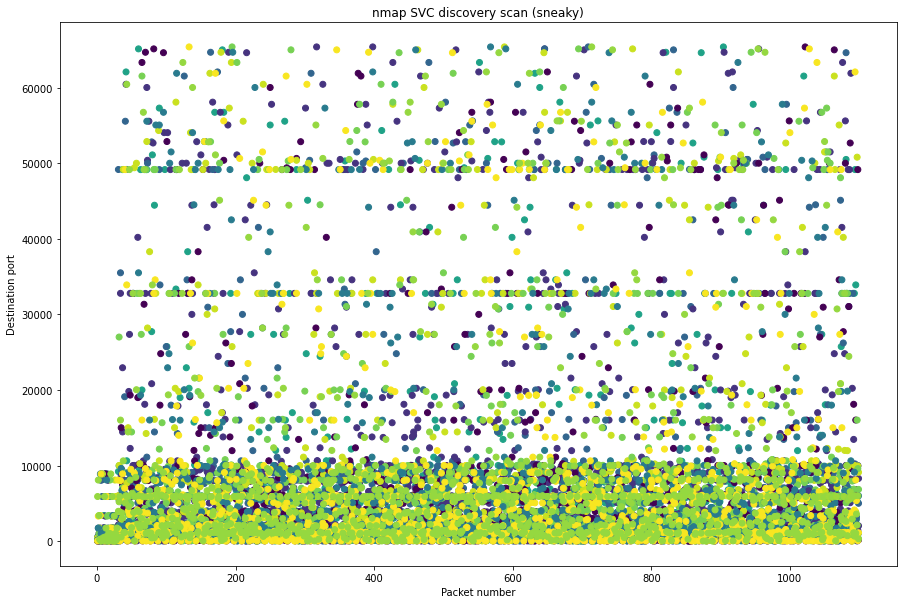

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

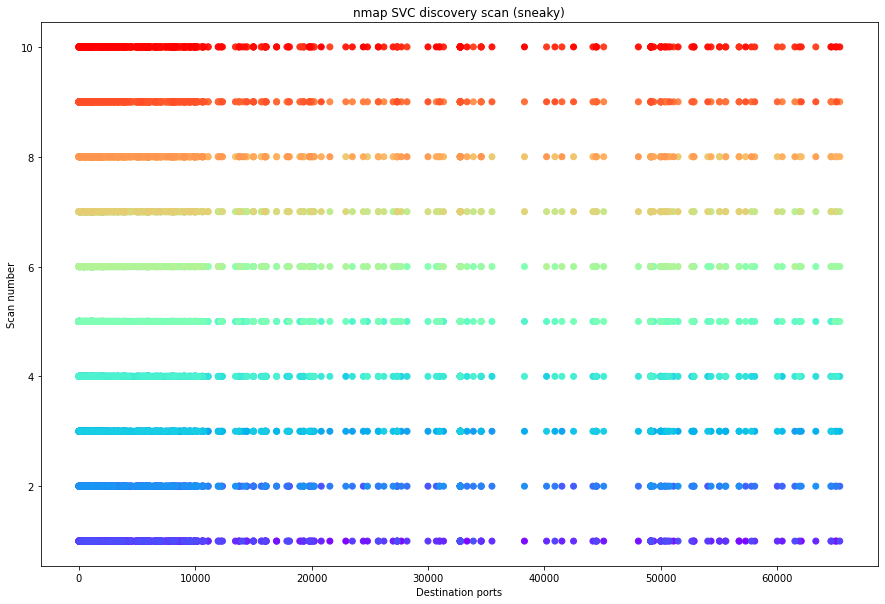

In [18]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


## Payloads

In [19]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

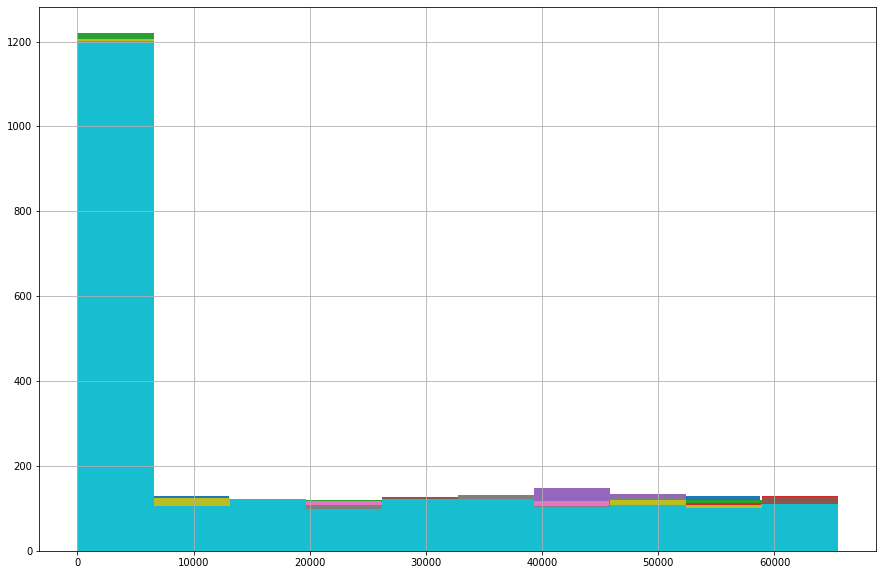

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

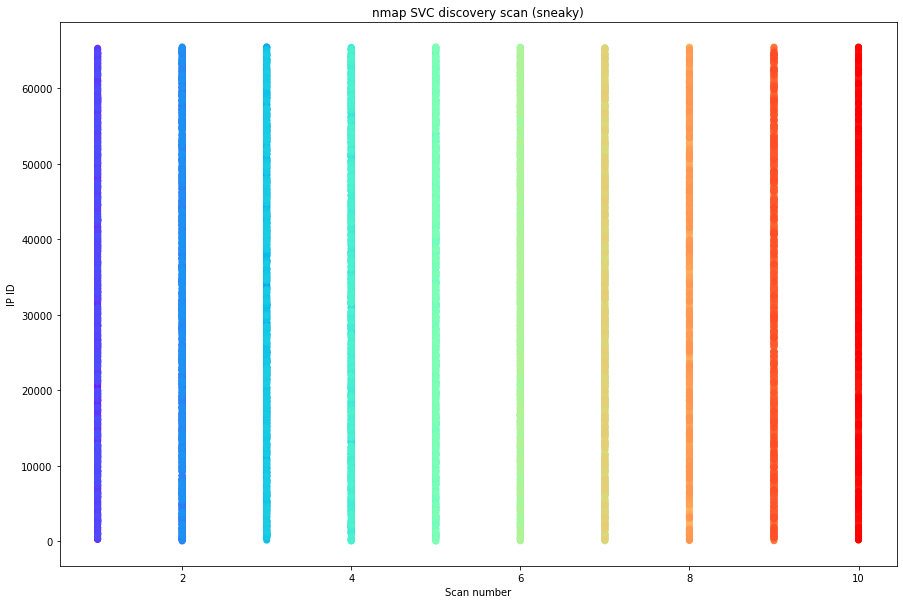

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


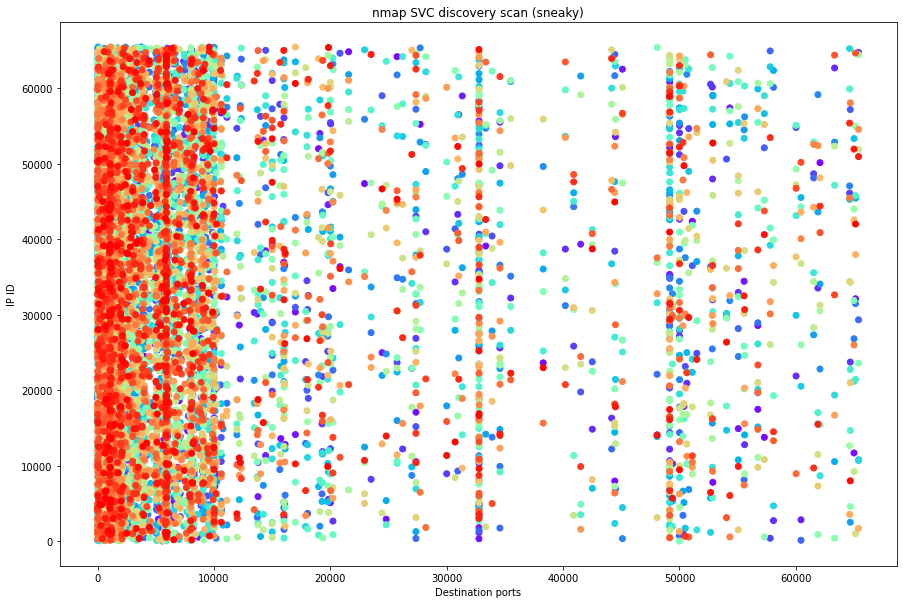

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

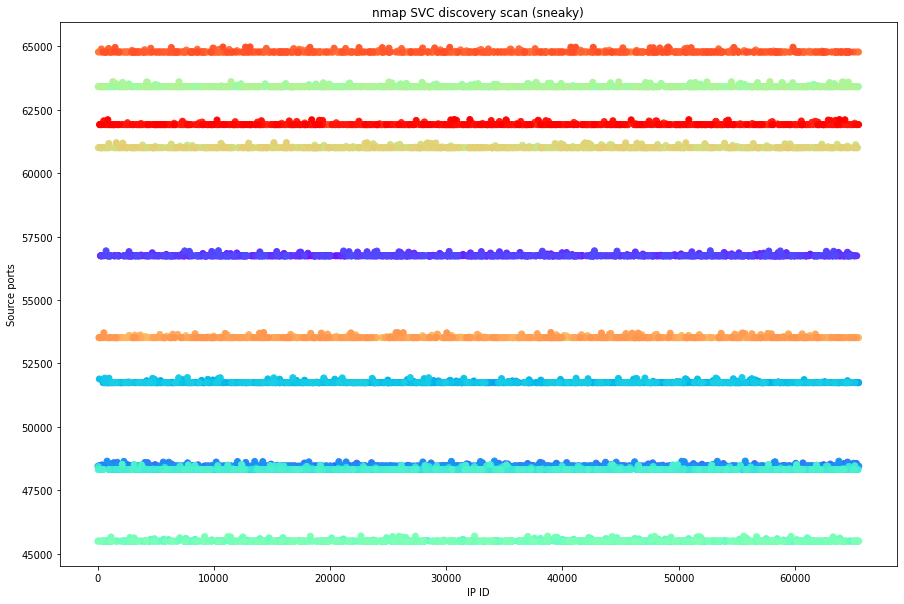

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet length: 44
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
-----
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Wind

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909609109
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909478039
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909871257
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
S

Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 916555779
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 916948997
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 916817927
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
Sequence number: 909281424
S

Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 735891504
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 736022578
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 735629364
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
Sequence number: 732287049
S

Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2684341760
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683948550
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2684079620
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 268

Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2670448340
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2670055130
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
Sequence number: 2683096595
-----
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1799314712
Sequence numbe

Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1801542982
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1801936192
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1801805122
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 179

Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1804426666
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1803771300
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 1803640230
Sequence number: 1798987037
Sequence number: 1798987037
Sequence number: 179

Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 526199745
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 526330819
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 525937605
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
Sequence number: 521415560
S

Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2061244820
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2060589466
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2060458392
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 206

Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2054822194
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2054691120
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2055084342
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 2062227875
Sequence number: 205

Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 774282690
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 774151616
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 774020550
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
Sequence number: 784309595
S

Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 591024472
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 591155550
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 591286620
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
S

Sequence number: 589910347
Sequence number: 602821004
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 601903490
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
Sequence number: 589910347
-----
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 812823806
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 81315

Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 805483662
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 805352588
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 806270082
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
Sequence number: 813151483
S

Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2347479392
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2347610470
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2347741540
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 2336797123
Sequence number: 233

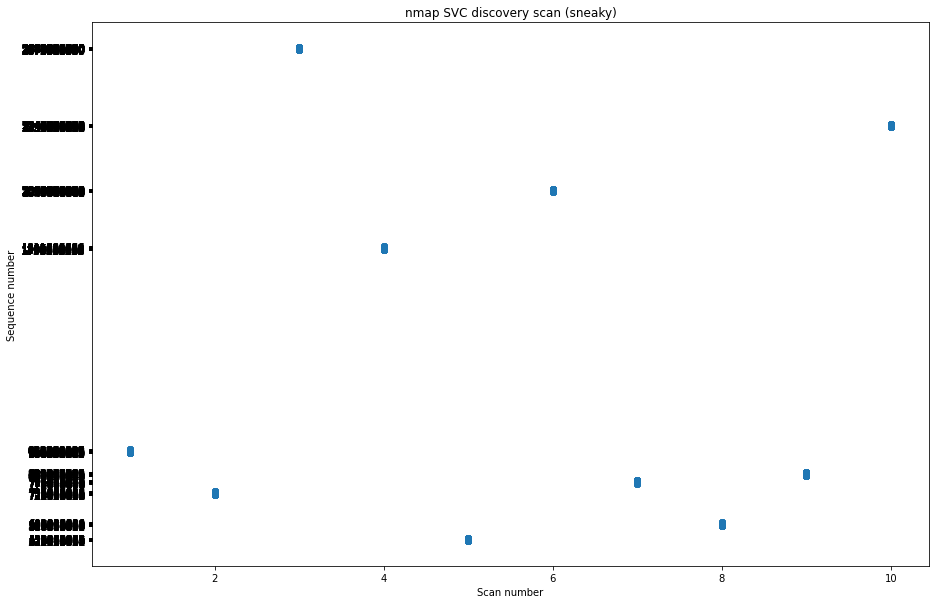

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


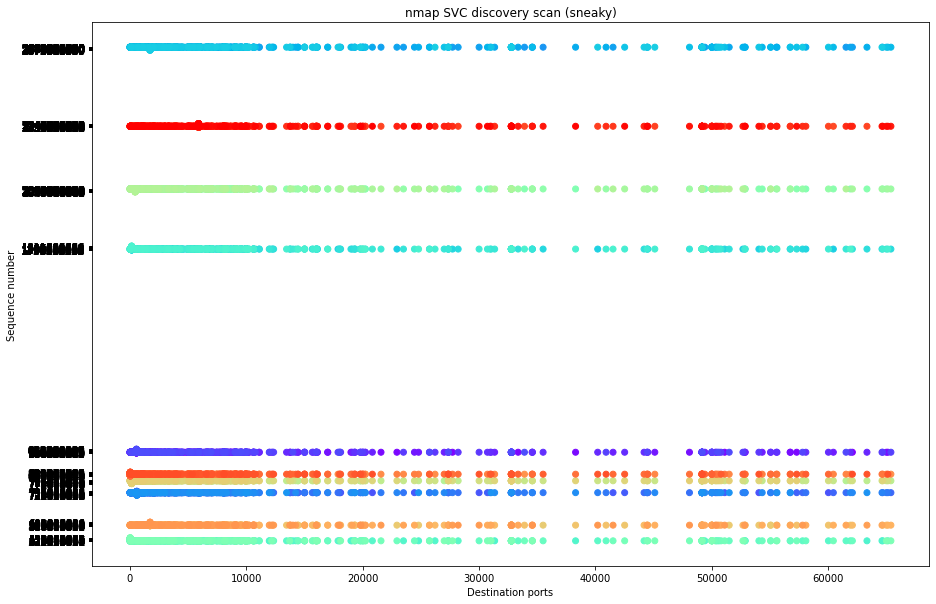

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

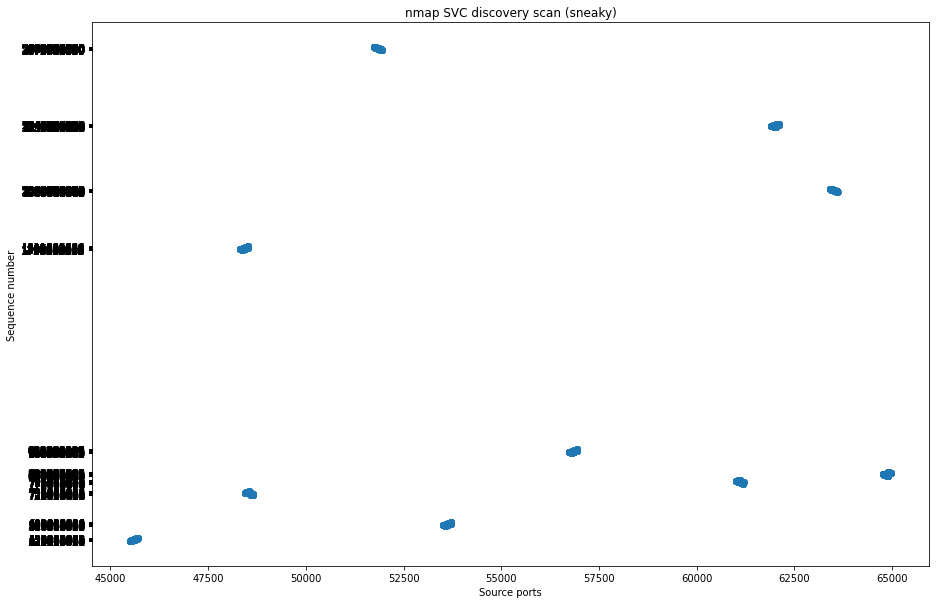

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [30]:
len(set(orders_port['sport']))

967

In [31]:
orders_port['sport'].value_counts()[:30]

56742    1000
63406    1000
48323    1000
64771    1000
53518    1000
51745    1000
45501    1000
48455    1000
61002    1000
61911    1000
48498       2
48520       2
48516       2
48514       2
48512       2
48510       2
48508       2
48506       2
48504       2
48502       2
48500       2
48470       2
48496       2
48494       2
48492       2
48490       2
48488       2
48486       2
48484       2
48482       2
Name: sport, dtype: int64

## Flags

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
-----
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flag

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F

Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
Flags: S
F